<h1>Minimax</h1>

En teoría de juegos, un árbol de juego es un grafo dirigido de tipo árbol cuyos nodos representan posiciones en el juego y cuyas aristas representan movimientos. Es posible representar una sucesión de jugadas mediante un camino conexo del árbol. 
<ul>
<li> El objetivo de los juegos de dos oponentes es realizar una serie de acciones que de manera óptima (con restricciones de tiempo y capacidad de explorar el árbol de búsqueda) lleven hacia la victoria.</li>
<li> El algoritmo de búsqueda Minimax trata de optimizar las acciones (Max) y al mismo tiempo minimizar las acciones del oponente (Min) </li>    
<li> Las acciones del oponente no son conocidas apriori y por lo tanto no es posible determinar el árbol de búsqueda, sin embargo podemos asumir que el oponente siempre va a realizar la mejor jugada que sea posible.</li>
<li> Al igual que la búsqueda en profundidad, Minimax tiene complejidad $O(b^d)$ y requerimientos de memoria $O(bd)$     </li>
</ul>

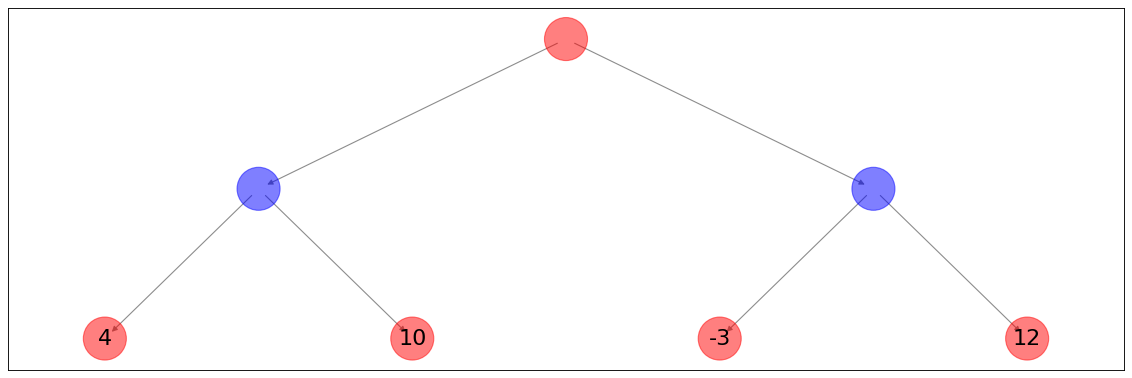

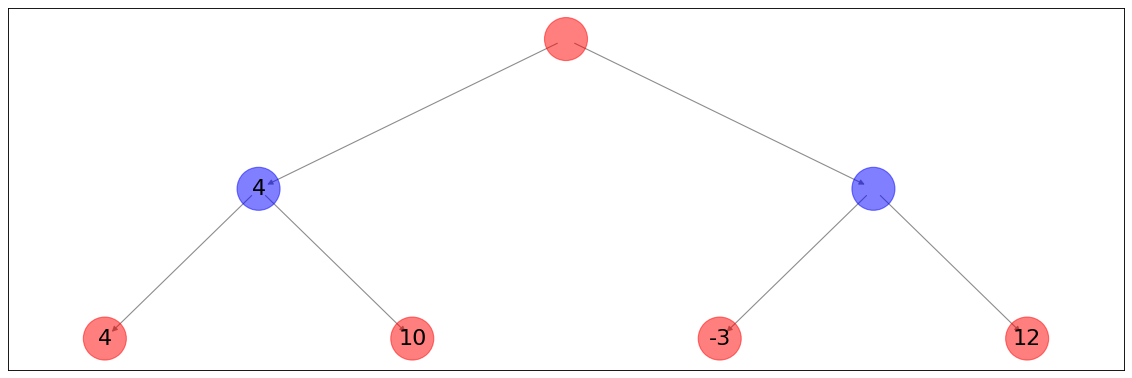

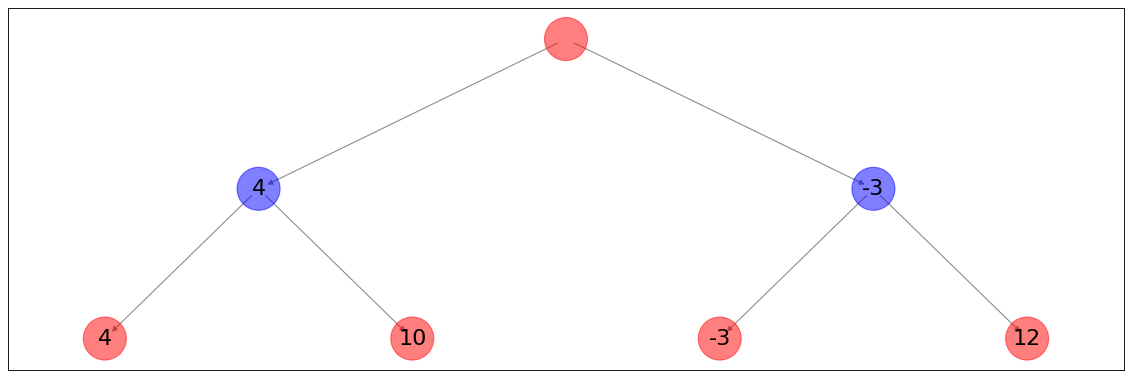

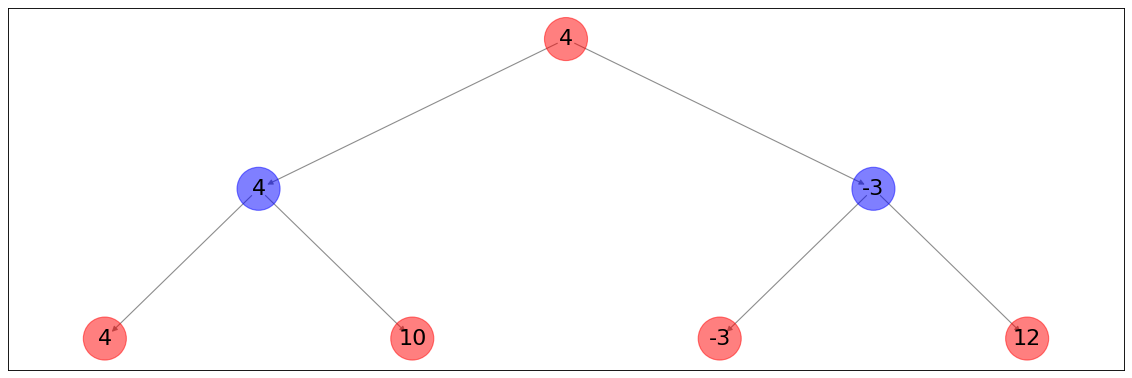

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G=nx.DiGraph()
G.add_edges_from([('a','b'),('a','c'),('b','d'),('b','f'),('c','g'),('c','h')])
pos={'a':(0,0),'b':(-1,-1),'c':(1,-1),'d':(-1.5,-2),'f':(-0.5,-2),'g':(1.5,-2),'h':(0.5,-2)}

node_color=['r','b','b','r','r','r','r']

#'a':4,'b':4,'c':-3,'d':4,'
max_labels={'d':4,'f':10,'g':12,'h':-3}
plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
nx.draw_networkx_edges(G,pos,edge_color='gray',width=1,alpha=0.9)
nx.draw_networkx_nodes(G,pos,node_size=1500,node_color=node_color,alpha=0.5)
nx.draw_networkx_labels(G,pos,max_labels,font_size=20,font_family='sans-serif')

min_labels=dict(max_labels,**{'b':4})
plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
nx.draw_networkx_edges(G,pos,edge_color='gray',width=1,alpha=0.9)
nx.draw_networkx_nodes(G,pos,node_size=1500,node_color=node_color,alpha=0.5)
nx.draw_networkx_labels(G,pos,min_labels,font_size=20,font_family='sans-serif')

min_labels=dict(min_labels,**{'c':-3})
plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
nx.draw_networkx_edges(G,pos,edge_color='gray',width=1,alpha=0.9)
nx.draw_networkx_nodes(G,pos,node_size=1500,node_color=node_color,alpha=0.5)
nx.draw_networkx_labels(G,pos,min_labels,font_size=20,font_family='sans-serif')
#plt.show()

max_labels=dict(min_labels,**{'a':4})
plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
nx.draw_networkx_edges(G,pos,edge_color='gray',width=1,alpha=0.9)
nx.draw_networkx_nodes(G,pos,node_size=1500,node_color=node_color,alpha=0.5)
nx.draw_networkx_labels(G,pos,max_labels,font_size=20,font_family='sans-serif')
plt.show()

<h1>Gato</h1>

El tres en línea, también conocido Gato es un juego de lápiz y papel entre dos jugadores: O y X, que marcan los espacios de un tablero de 3×3 alternadamente. Un jugador gana si consigue tener una línea de tres de sus símbolos: la línea puede ser horizontal, vertical o diagonal.


In [15]:
import numpy as np


class Gato:
    
    def __init__(self,board=None):
        if board is None:
            self.board=np.zeros((3,3))
        else:
            self.board=board
        self.player={'human':1,'ai':-1,'draw':-2}


    def get_player_char(self,player_id):
        char=' '
        if (player_id==self.player['human']):
            char='X'
        elif (player_id==self.player['ai']):
            char='O'
        elif (player_id==self.player['draw']):
            char='Empate'
        return char
    
    def check_winner(self,player_id,board=None):
        if board is None:
            board=self.board
        ind=player_id*3
        winner=False
        if (np.any(board.sum(axis=0)==ind) or np.any(board.sum(axis=1)==ind) or np.trace(board)==ind or np.trace(np.fliplr(board))==ind):
            winner=True
        return winner

    def print_board(self,board=None):
        if board is None:
            board=self.board
        print('-----------')
        print(' ' + self.get_player_char(board[0][0]) + ' | ' 
              + self.get_player_char(board[0][1]) + ' | ' 
              + self.get_player_char(board[0][2]))
        print('-----------')
        print(' ' + self.get_player_char(board[1][0]) + ' | ' 
              + self.get_player_char(board[1][1]) + ' | ' 
              + self.get_player_char(board[1][2]))
        print('-----------')
        print(' ' + self.get_player_char(board[2][0]) + ' | ' 
              + self.get_player_char(board[2][1]) + ' | ' 
              + self.get_player_char(board[2][2]))
        print('-----------')

    def available_moves(self,board=None):
        if board is None:
            board=self.board
        x,y=np.where(board==0)
        return list(zip(x,y))

    def utility(self):
        utility=None
        if(self.check_winner(self.player['human'],self.board)):
            utility=-1
        elif(self.check_winner(self.player['ai'],self.board)):
            utility=1
        elif(not np.any(self.board==0)):
            utility=0
        return utility

    


In [19]:
import time

class play_game:
        
    def __init__(self,max_depth=8):
        self.node=Gato()
        self.max_depth=max_depth
    
    def minimax(self,node, maximizing, max_depth):
        #if(not np.any(node.board==0)) or max_depth == 0:
        if node.utility() or max_depth == 0:
            return node.utility()
        if maximizing:
            best_eval = float("-inf") # arbitrarily low starting point
            for move in node.available_moves():
                new_board=node.board.copy()
                new_board[move[0]][move[1]]=node.player['ai']
                child_node=Gato(board=new_board)
                result = self.minimax(child_node, False, max_depth - 1)
                best_eval = max(result, best_eval) # we want the move with the highest evaluation
            return best_eval
        else: # minimizing
            worst_eval: float = float("inf")
            for move in node.available_moves():
                new_board=node.board.copy()
                new_board[move[0]][move[1]]=node.player['human']
                child_node=Gato(board=new_board)
                result = self.minimax(child_node, True, max_depth - 1)
                worst_eval = min(result, worst_eval) # we want the move with the lowest evaluation
            return worst_eval
    
    def alfa_beta(self,node, maximizing, alfa=float("-inf"),beta=float("inf")):
        #if(not np.any(node.board==0)) or alfa>=beta:
        if node.utility() or alfa>=beta: 
            return node.utility()
        if maximizing:
            for move in node.available_moves():
                new_board=node.board.copy()
                new_board[move[0]][move[1]]=node.player['ai']
                child_node=Gato(board=new_board)
                result = self.alfa_beta(child_node, False, alfa,beta)
                alfa = max(result, alfa) # we want the move with the highest evaluation
                if alfa>=beta:
                      return alfa
            return alfa
        else: # minimizing
            for move in node.available_moves():
                new_board=node.board.copy()
                new_board[move[0]][move[1]]=node.player['human']
                child_node=Gato(board=new_board)
                result = self.alfa_beta(child_node, True, alfa,beta)
                beta = min(result, beta) # we want the move with the lowest evaluation
                if alfa>=beta:
                      return beta
            return beta
        
    def human_move(self):
        moves=self.node.available_moves()
        z=eval(input('Ingrese jugada : '))
        while z not in moves or not isinstance(z, tuple):
            print('no disponible!')
            z=eval(input('Ingrese jugada : '))
        self.node.board[z[0]][z[1]]=self.node.player['human']
        
    def ai_move(self,prune):
        moves=self.node.available_moves()
        score=[]
        for move in moves:
            new_board=self.node.board.copy()
            new_board[move[0]][move[1]]=self.node.player['ai']
            child_node=Gato(board=new_board)
            if prune:
              new_score=self.alfa_beta(child_node,False)
            else:
              new_score=self.minimax(child_node,False,self.max_depth)
            score.append(new_score)
        for i,j in zip(score,moves):
            print(i,j)
        z=moves[np.argmax(score)]
        self.node.board[z[0]][z[1]]=self.node.player['ai']
   
    def get_winner(self):
        out=False
        if(self.node.check_winner(self.node.player['human'])):
            print('Human wins!')
            out=True
        elif(self.node.check_winner(self.node.player['ai'])):
            print('AI wins')
            out=True
        elif(not np.any(self.node.board==0)):
            print('Draw')
            out=True
        return out
    
    def main(self,prune=False):
        winner=False
        player=self.node.player['ai']
        #player=[self.ai,self.human][np.random.binomial(1,0.5)]
        while(True):
            if(not np.any(self.node.board==0)):
                player=self.node.player['draw']
                break
            if(player==self.node.player['human']):
                self.human_move()
                print('Human:')
                self.node.print_board()
                if self.get_winner():
                    break
                else:
                    player=self.node.player['ai']
            elif(player==self.node.player['ai']):
                print('AI:')
                t=time.time()
                self.ai_move(prune)
                print('ellapsed time : {0:.2f}[s]'.format(time.time()-t))
                self.node.print_board() 
                if self.get_winner():
                    break
                else:
                    player=self.node.player['human']
                
    

In [7]:
if __name__ == '__main__':
    play_game().main(prune=False)

AI:
0 (0, 0)
-1 (0, 1)
0 (0, 2)
-1 (1, 0)
0 (1, 1)
-1 (1, 2)
0 (2, 0)
-1 (2, 1)
0 (2, 2)
ellapsed time : 39.72[s]
-----------
 O |   |  
-----------
   |   |  
-----------
   |   |  
-----------
Ingrese jugada : 2,1
Human:
-----------
 O |   |  
-----------
   |   |  
-----------
   | X |  
-----------
AI:
0 (0, 1)
1 (0, 2)
-1 (1, 0)
0 (1, 1)
-1 (1, 2)
0 (2, 0)
0 (2, 2)
ellapsed time : 0.52[s]
-----------
 O |   | O
-----------
   |   |  
-----------
   | X |  
-----------
Ingrese jugada : 1,1
Human:
-----------
 O |   | O
-----------
   | X |  
-----------
   | X |  
-----------
AI:
1 (0, 1)
-1 (1, 0)
-1 (1, 2)
-1 (2, 0)
-1 (2, 2)
ellapsed time : 0.02[s]
-----------
 O | O | O
-----------
   | X |  
-----------
   | X |  
-----------
AI wins


<h1>Poda alpha-beta</h1>

<ul>
<li> El problema con la búsqueda Minimax es que el número de evaluaciones del estado del juego crece exponencialmente con la profundidad del árbol.</li>
<li> Una alternativa eficiente es podar el árbol y de esa manera eliminar caminos que no tengan mayor influencia en la decisión final.</li>
<li> El valor $\alpha$ representa el mejor valor encontrado por MAX en un camino dado. Cualquier vértice $V$ menor que $\alpha$ no necesita ser evaluado. </li>
<li> El valor $\beta$ representa el mejor valor encontrado por MIN en un camino dado. </li>
<li> Cuando un nodo $V$ detecta que su evaluaci\'on ser\'a peor que $\alpha$ y $\beta$ actuales, poda el sub-árbol con los hijos de $V$. </li>
 </ul>

In [ ]:
if __name__ == '__main__':
    play_game().main(prune=True)

AI:
1 (0, 0)
1 (0, 1)
1 (0, 2)
1 (1, 0)
1 (1, 1)
1 (1, 2)
1 (2, 0)
1 (2, 1)
1 (2, 2)
ellapsed time : 2.01[s]
-----------
 O |   |  
-----------
   |   |  
-----------
   |   |  
-----------
